<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/ICA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Morreale ICA #2
RIN: 662024409

#Data Loading

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive



drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/plot-data.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.columns = ['x', 'y']

In [13]:
df.head()

,x,y
0,1733.029645,80.733946
1,2281.438991,80.886853
2,2901.927663,81.345568
3,3691.172191,81.345568
4,4235.118518,81.345568


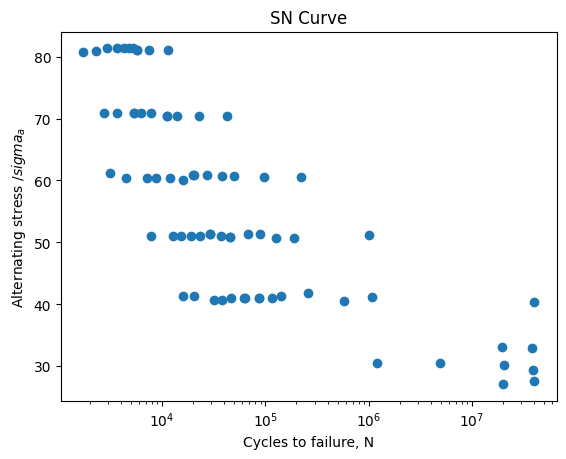

In [63]:
plt.scatter(df['x'].to_numpy(),df['y'].to_numpy())
plt.xlabel('Cycles to failure, N')
plt.ylabel('Alternating stress $/sigma_a$')
plt.title('SN Curve')
plt.xscale('log')
plt.show()

#Data Preperation

In [59]:
df['sample_type']= 0

In [60]:
df

,x,y,sample_type
0,1733.029645,80.733946,0
1,2281.438991,80.886853,0
2,2901.927663,81.345568,0
3,3691.172191,81.345568,0
4,4235.118518,81.345568,0
...,...,...,...
68,62879.279082,40.978595,0
69,61807.992731,40.978595,0
70,87156.307469,40.978595,0
71,87156.307469,40.978595,0


In [61]:
df.loc[df['x'] > 1e7, 'sample_type' ] = 1

In [62]:
df

,x,y,sample_type
0,1733.029645,80.733946,0
1,2281.438991,80.886853,0
2,2901.927663,81.345568,0
3,3691.172191,81.345568,0
4,4235.118518,81.345568,0
...,...,...,...
68,62879.279082,40.978595,0
69,61807.992731,40.978595,0
70,87156.307469,40.978595,0
71,87156.307469,40.978595,0


#Data Visualization

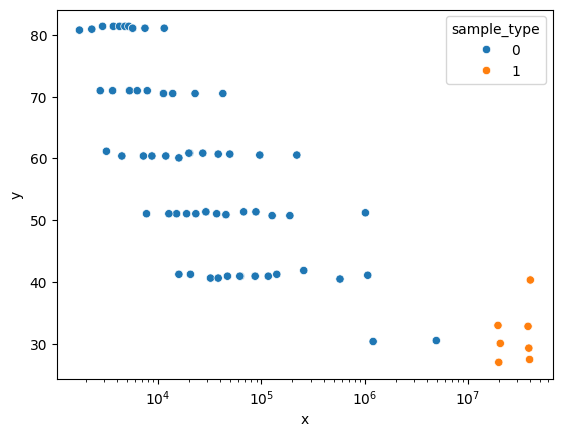

In [64]:
sns.scatterplot(data = df, x = 'x', y = 'y', hue ='sample_type')
plt.xscale('log')

In [65]:
X = df[['x', 'y']].to_numpy()
y = df['sample_type'].to_numpy()

In [66]:
print(X.shape)
print(y.shape)

(73, 2)
(73,)


#Training Model

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)



In [68]:
print(y_train)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [69]:
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [70]:
knn = KNeighborsClassifier(n_neighbors =3, p = 2)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#Results

In [72]:
knn.score(X_test, y_test)

1.0

In [73]:
knn.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [74]:
cm = confusion_matrix(y_test, knn.predict(X_test))

Text(20.72222222222222, 0.5, 'Actual')

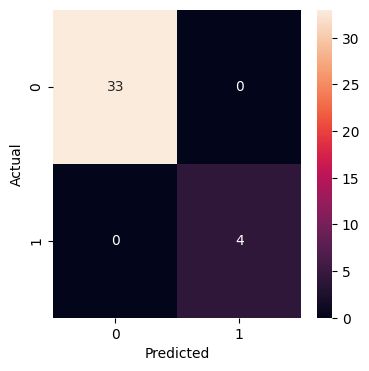

In [75]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#